In [1]:
!pip install keplergl

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests 
from bs4 import BeautifulSoup 
import re 

In [3]:
df = pd.read_csv("deprem4.csv")

In [4]:
df

,Unnamed: 0,İsimler,Telefon,Şehir,Tarih,Saat,Çocuk sayısı,Yaşlı sayısı,Kadın sayısı,Erkek sayısı,Bebek sayısı,Gıda ihtiyacı,Kıyafet ihtiyacı,Isı ihtiyacı,Çadır ihtiyacı
0,0,Halimekara,05350738599,Hatay,2023-03-18,15:39:22,0,0,0,0,0,0,0,0,0
1,1,Alidasci,05532096026,Kahramanmaraş,2023-03-17,11:41:11,0,0,0,0,0,0,1,0,0
2,3,İbrahimkabçak,05317413367,Hatay,2023-03-15,05:18:51,1,0,0,0,0,0,0,1,1
3,4,Nezihavaran,05315515974,Adana,2023-03-13,16:57:15,0,0,0,0,0,0,0,0,0
4,5,Serpil,05325485230,Hatay,2023-03-13,01:54:30,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2096,İsimsiz,Numarasız,Kahramanmaraş,2023-02-07,09:03:50,0,0,0,0,0,0,0,0,0
2021,2107,İsimsiz,Numarasız,Gaziantep,2023-02-07,08:47:50,0,0,0,0,0,0,0,0,0
2022,2137,İsimsiz,Numarasız,Hatay,2023-02-06,00:45:03,0,0,0,0,0,0,0,0,0
2023,2138,İsimsiz,Numarasız,Kahramanmaraş,2023-02-06,00:19:42,0,0,0,0,0,0,0,0,0


# Bu grafik, yatay bir çubuk grafiğidir ve ismini belirten kişilerin sayısı ile yatay eksen, "True" ve "False" değerleriyle dikey eksen olarak gösterilir. Yani, Hatay'da ismini belirten kişiler "True" ve belirtmeyenler "False" olarak etiketlenir. Bu grafiğin amacı, Hatay'da kaç kişinin isim belirttiğini görselleştirmektir.

<AxesSubplot:>

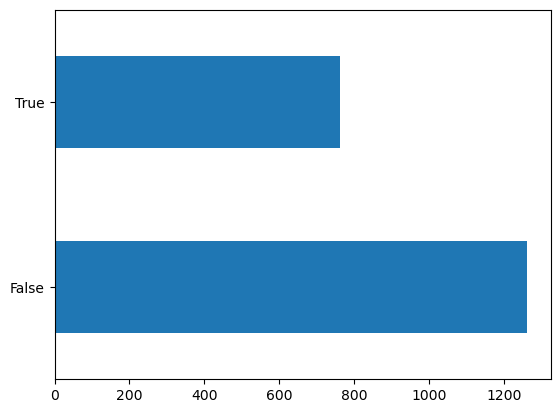

In [5]:
sehir_isimler=((df["Şehir"]=="Hatay")&df["İsimler"]).value_counts()
sehir_isimler.plot.barh()

In [6]:
df['Toplam_ihtiyac'] = df['Gıda ihtiyacı'] + df['Kıyafet ihtiyacı'] + df['Isı ihtiyacı'] + df['Çadır ihtiyacı']

In [7]:
df

,Unnamed: 0,İsimler,Telefon,Şehir,Tarih,Saat,Çocuk sayısı,Yaşlı sayısı,Kadın sayısı,Erkek sayısı,Bebek sayısı,Gıda ihtiyacı,Kıyafet ihtiyacı,Isı ihtiyacı,Çadır ihtiyacı,Toplam_ihtiyac
0,0,Halimekara,05350738599,Hatay,2023-03-18,15:39:22,0,0,0,0,0,0,0,0,0,0
1,1,Alidasci,05532096026,Kahramanmaraş,2023-03-17,11:41:11,0,0,0,0,0,0,1,0,0,1
2,3,İbrahimkabçak,05317413367,Hatay,2023-03-15,05:18:51,1,0,0,0,0,0,0,1,1,2
3,4,Nezihavaran,05315515974,Adana,2023-03-13,16:57:15,0,0,0,0,0,0,0,0,0,0
4,5,Serpil,05325485230,Hatay,2023-03-13,01:54:30,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2096,İsimsiz,Numarasız,Kahramanmaraş,2023-02-07,09:03:50,0,0,0,0,0,0,0,0,0,0
2021,2107,İsimsiz,Numarasız,Gaziantep,2023-02-07,08:47:50,0,0,0,0,0,0,0,0,0,0
2022,2137,İsimsiz,Numarasız,Hatay,2023-02-06,00:45:03,0,0,0,0,0,0,0,0,0,0
2023,2138,İsimsiz,Numarasız,Kahramanmaraş,2023-02-06,00:19:42,0,0,0,0,0,0,0,0,0,0


# Bu kod, bir bar grafiği çizer ve her bir barın yüksekliğini belirlemek için "Şehir" sütunundaki verilerin sayısını kullanır.

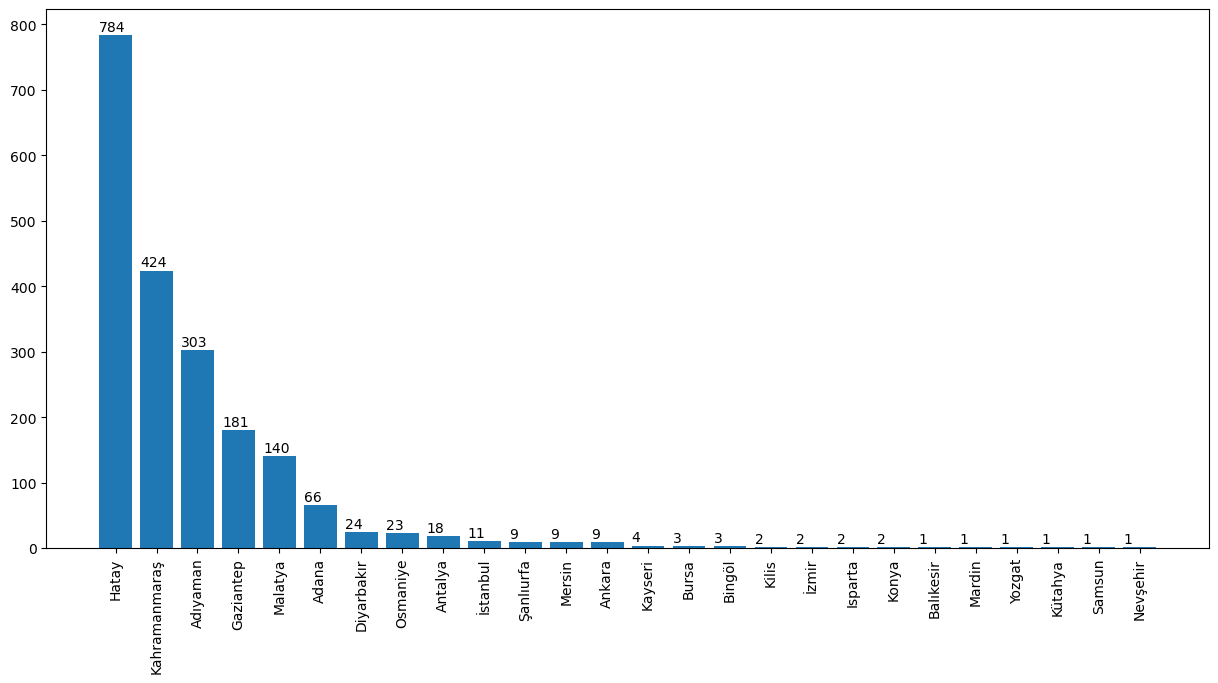

In [8]:
plt.figure(figsize=(15,7));
bar_plt = plt.bar(x=df["Şehir"].value_counts().index, height=df["Şehir"].value_counts().values);
plt.xticks(rotation=90);

for i in bar_plt.patches:
    plt.annotate(int(i.get_height()),(i.get_x(),i.get_height()+6))

# İnternetten ortalama olarak hesapladığımız giysi ihtiyacı fiyat bilgisini değişkenlere atadık.

In [9]:
günlük_kiyafet_cocuk=500
gecelik_kiyafet_cocuk=600
günlük_kiyafet_kadin=1000
gecelik_kiyafet_kadin=500
günlük_kiyafet_bebek=300
gecelik_kiyafet_bebek=300
günlük_kiyafet_erkek=800
gecelik_kiyafet_erkek=400
günlük_kiyafet_yasli=300
gecelik_kiyafet_yasli=300

# Sınıf olarak belirtilen kişi sayısıyla ortalama giysi ihtiyacı nakti miktarı çarpıyoruz.

In [10]:
toplam_kiyafet_cocuk=günlük_kiyafet_cocuk+gecelik_kiyafet_cocuk
cocuk_nakti_ihtiyac=((df["Çocuk sayısı"]==1).value_counts()*toplam_kiyafet_cocuk)[1]

In [11]:
toplam_kiyafet_erkek=günlük_kiyafet_erkek+gecelik_kiyafet_erkek
erkek_nakti_ihtiyac=((df["Erkek sayısı"]==1).value_counts()*toplam_kiyafet_erkek)[1]

In [12]:
toplam_kiyafet_kadin=günlük_kiyafet_kadin+gecelik_kiyafet_kadin
kadin_nakti_ihtiyac=((df["Kadın sayısı"]==1).value_counts()*toplam_kiyafet_kadin)[1]

In [13]:
toplam_kiyafet_yasli=günlük_kiyafet_yasli+gecelik_kiyafet_yasli
yasli_nakti_ihtiyac=((df["Yaşlı sayısı"]==1).value_counts()*toplam_kiyafet_yasli)[1]

In [14]:
toplam_kiyafet_bebek=günlük_kiyafet_bebek+gecelik_kiyafet_bebek
bebek_nakti_ihtiyac=((df["Bebek sayısı"]==1).value_counts()*toplam_kiyafet_bebek)[1]

# Nakti ihtiyaç sütununa gruplandırdığımız verileri atıyoruz. 

In [15]:
nakti_ihtiyac=[]
nakti_ihtiyac.append(cocuk_nakti_ihtiyac)
nakti_ihtiyac.append(erkek_nakti_ihtiyac)
nakti_ihtiyac.append(kadin_nakti_ihtiyac)
nakti_ihtiyac.append(yasli_nakti_ihtiyac)
nakti_ihtiyac.append(bebek_nakti_ihtiyac)

In [16]:
nakti_ihtiyac

[61600, 15600, 21000, 4200, 12000]

In [17]:
index_names = ["Çocuk Nakti İ.", "Erkek Nakti İ.", "Kadın Nakti İ", "Yaşlı Nakti İ", "Bebek Nakti İ."]

In [18]:
dfr = pd.DataFrame(nakti_ihtiyac, columns=["nakti_ihtiyac"], index=index_names)
dfr

,nakti_ihtiyac
Çocuk Nakti İ.,61600
Erkek Nakti İ.,15600
Kadın Nakti İ,21000
Yaşlı Nakti İ,4200
Bebek Nakti İ.,12000


# Veri, dfr DataFrame'inin "nakti_ihtiyac" sütunundan alınır. X ekseninde, "nakti_ihtiyac" sütununda bulunan benzersiz değerler listelenir ve y ekseninde, her bir nakti_ihtiyaç türü için toplam ihtiyaç miktarı gösterilir.

Text(0, 0.5, 'Nakti İhtiyaç Miktarı')

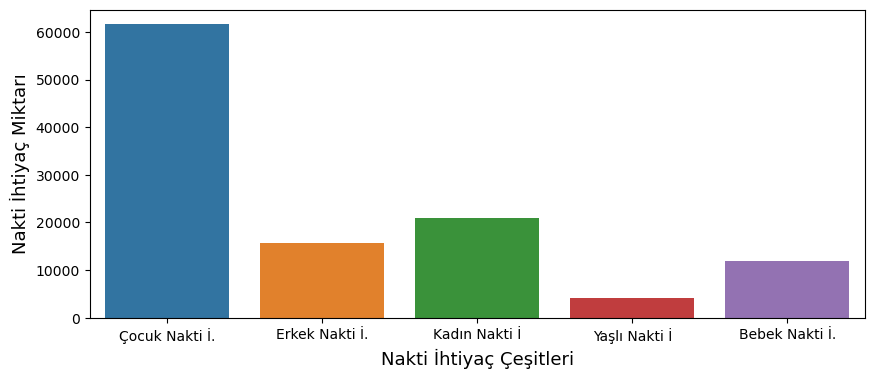

In [19]:
plt.figure(figsize=(10,4))
floor_bar = sns.barplot(x=dfr.index, y=dfr["nakti_ihtiyac"])
plt.xlabel("Nakti İhtiyaç Çeşitleri",fontsize = 13)
plt.ylabel("Nakti İhtiyaç Miktarı",fontsize = 13)

# Bu bir saçılım grafiği dir.  Veri, df DataFrame'inin "Şehir" ve "Telefon" sütunlarından alınır. X ekseninde, "Şehir" sütunundaki benzersiz değerler listelenir ve y ekseninde, "Telefon" sütunundaki değerler gösterilir. Her bir nokta şehirdeki telefon sayısını temsil eder.

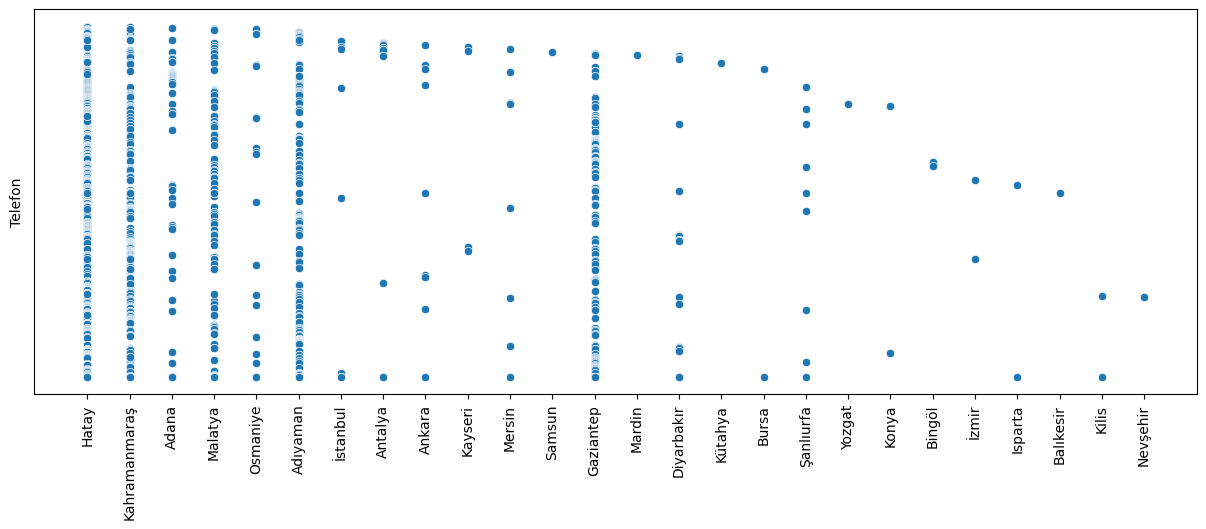

In [20]:
plt.figure(figsize=(15,5));
sns.scatterplot(x="Şehir", y="Telefon", data=df);
plt.xlabel("");
plt.yticks([]);
plt.xticks(rotation=90);

# Grafikte her şehir için bir nokta çizilir ve her nokta, o şehirdeki tarihi temsil eder. Mavi noktalar numarasız telefonları temsil ederken, turuncu noktalar numaralı telefonları temsil eder. 

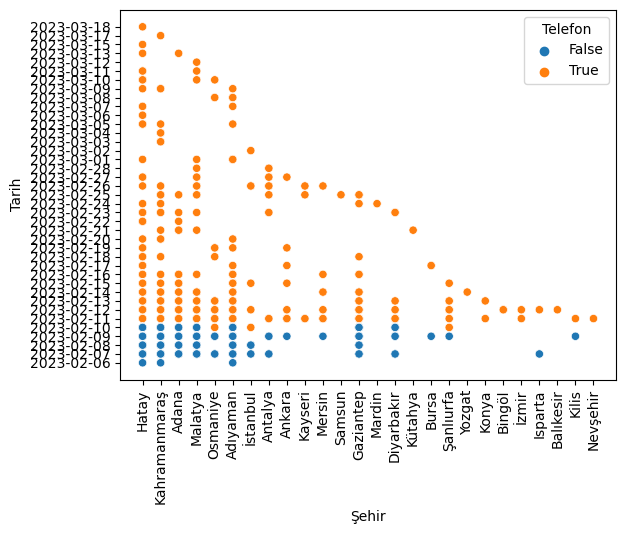

In [21]:
sns.scatterplot(x="Şehir",y="Tarih",hue=df["Telefon"]!="Numarasız",data=df);
plt.xticks(rotation=90);

# "Gıda ihtiyacı", "Kıyafet ihtiyacı", "Isı ihtiyacı" ve "Çadır ihtiyacı" sütunlarını seçerek, bu ihtiyaç türlerinin toplam ihtiyaç miktarlarını hesaplar. Bu grafiğe göre en çok çadıra ihtiyaç vardır. 

In [22]:
df2 = df[["Gıda ihtiyacı", "Kıyafet ihtiyacı", "Isı ihtiyacı", "Çadır ihtiyacı"]]

In [23]:
total_needs = df2.sum(axis=0)

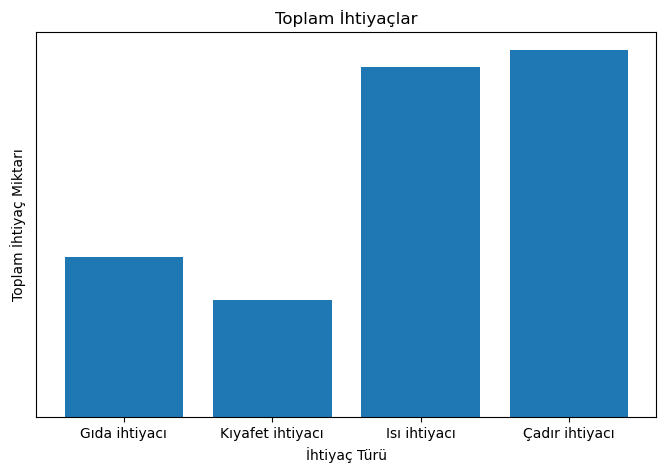

In [24]:
plt.figure(figsize=(8,5))
plt.bar(total_needs.index, total_needs.values)
plt.xlabel("İhtiyaç Türü")
plt.ylabel("Toplam İhtiyaç Miktarı")
plt.title("Toplam İhtiyaçlar")
plt.yticks([]);
plt.show()

In [25]:
Toplam_ihtiyac=df["Toplam_ihtiyac"].value_counts().sort_values(ascending=False)
Toplam_ihtiyac
#0 indeksi ihtiyaç belirtilmeyen yardım çağrısı
#1 indeksi bir  çeşit ihtiyaç belirtilen yardım çağrısı
#2 indeksi iki çeşit ihtiyaç belirtilen yardım çağrısı
#2 indeksi üç çeşit ihtiyaç belirtilen yardım çağrısı

0    1833
1     158
2      30
3       4
Name: Toplam_ihtiyac, dtype: int64

# X ekseni, farklı "Toplam_ihtiyac" değerlerini, Y ekseni ise her bir değerin kaç kez tekrarlandığını gösterir. Eğer bazı "Toplam_ihtiyac" değerleri diğerlerine göre daha fazla tekrarlanmışsa, grafikteki çubuklar daha yüksek olacaktır.

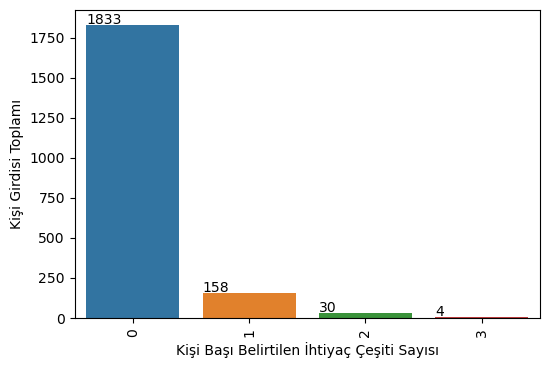

In [26]:
x=Toplam_ihtiyac.index
y=Toplam_ihtiyac.values
plt.figure(figsize=(6,4))
bar=sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.xlabel("Kişi Başı Belirtilen İhtiyaç Çeşiti Sayısı");
plt.ylabel("Kişi Girdisi Toplamı");
for i in bar.patches:
    plt.annotate(int(i.get_height()),(i.get_x(),i.get_height()+6))

# Grafiklerin x-ekseni, ihtiyacın belirtilip belirtilmediğini gösteren bir oranı temsil ederken, y-ekseni kişi girdisini temsil eder. 

Text(0.5, 0, 'Kıyafet ihtiyacı Belirtilmeyen ve Belirtilenin Oranı')

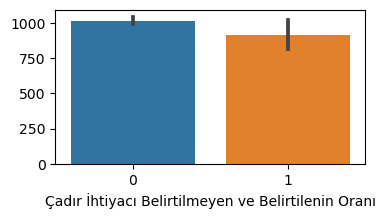

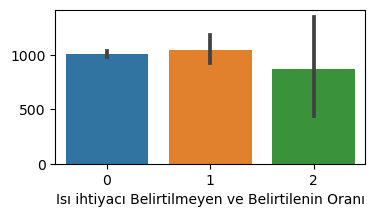

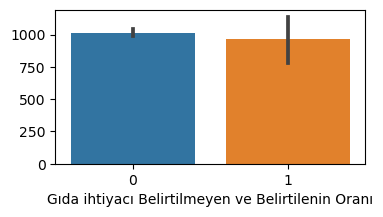

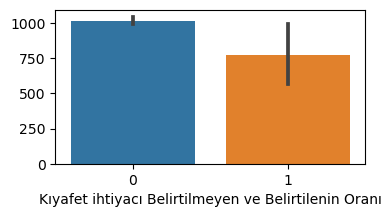

In [27]:
plt.figure(figsize=(4,2))
sns.barplot(x=df["Çadır ihtiyacı"].values, y=df["Çadır ihtiyacı"].index )
plt.xlabel("Çadır İhtiyacı Belirtilmeyen ve Belirtilenin Oranı")
plt.figure(figsize=(4,2))
sns.barplot(x=df["Isı ihtiyacı"].values, y=df["Isı ihtiyacı"].index )
plt.xlabel("Isı ihtiyacı Belirtilmeyen ve Belirtilenin Oranı")
plt.figure(figsize=(4,2))
sns.barplot(x=df["Gıda ihtiyacı"].values, y=df["Gıda ihtiyacı"].index )
plt.xlabel("Gıda ihtiyacı Belirtilmeyen ve Belirtilenin Oranı")
plt.figure(figsize=(4,2))
sns.barplot(x=df["Kıyafet ihtiyacı"].values, y=df["Kıyafet ihtiyacı"].index )
plt.xlabel("Kıyafet ihtiyacı Belirtilmeyen ve Belirtilenin Oranı")

# Harita oluşturmak için eşsiz şehir verileri toplanıp city listesine atılır ve alfabetik olarak sıralanır.Pivot table kullanarak her şehir için birey sayısı ve ihtiyaçlar toplanıp sıralandırılır.Gruplandırılan pivot sütunlarını sözlüğe dönüştürmek için listelere atama yapılır. Haritada kordinat olarak göstermek için enlem boylam değerlerini her şehire göre bulunup latr longr değişkenlerine atılmıştır. Haritada her şehir için toplam belirtilen birey sayısı ve ihtiyaç miktarı gösterilir.

In [28]:
city=df["Şehir"].unique()

In [29]:
city_sorted = sorted(city)

In [30]:
df_pivot = pd.pivot_table(df, values=['Çocuk sayısı','Yaşlı sayısı','Kadın sayısı','Erkek sayısı','Bebek sayısı','Kıyafet ihtiyacı','Çadır ihtiyacı','Isı ihtiyacı','Gıda ihtiyacı'], index='Şehir', aggfunc=np.sum)
df_pivot

,Bebek sayısı,Erkek sayısı,Gıda ihtiyacı,Isı ihtiyacı,Kadın sayısı,Kıyafet ihtiyacı,Yaşlı sayısı,Çadır ihtiyacı,Çocuk sayısı
Şehir,,,,,,,,,
Adana,0,1,0,2,0,1,0,2,2
Adıyaman,5,3,4,20,4,5,2,12,9
Ankara,0,0,0,0,0,0,0,0,0
Antalya,1,0,0,1,0,1,0,1,1
Balıkesir,0,0,0,0,0,0,0,0,0
Bingöl,0,0,0,0,0,0,0,0,0
Bursa,0,0,0,0,0,0,0,0,0
Diyarbakır,0,0,1,1,0,1,0,2,1
Gaziantep,2,1,0,6,1,2,0,10,1


In [31]:
kid=[]
for a in df_pivot["Çocuk sayısı"]:
    kid.append(a)

In [32]:
elder=[]
for a in df_pivot["Yaşlı sayısı"]:
    elder.append(a)

In [33]:
woman=[]
for a in df_pivot["Kadın sayısı"]:
    woman.append(a)

In [34]:
man=[]
for a in df_pivot["Erkek sayısı"]:
    man.append(a)

In [35]:
baby=[]
for a in df_pivot["Bebek sayısı"]:
    baby.append(a)

In [36]:
food=[]
for a in df_pivot["Gıda ihtiyacı"]:
    food.append(a)

In [37]:
dress=[]
for a in df_pivot["Kıyafet ihtiyacı"]:
    dress.append(a)

In [38]:
temp=[]
for a in df_pivot["Isı ihtiyacı"]:
    temp.append(a)

In [39]:
tent=[]
for a in df_pivot["Çadır ihtiyacı"]:
    tent.append(a)
len(tent) 

26

In [40]:
latr=[37.50,37.77,39.05,37.21,39.43,39.04,40.19,37.91,37.06,36.96,37.76,37.58,38.73,36.72,37.87,39.42,38.35,37.31,36.81,38.63,37.07,41.29,39.82,41.01,38.34,37.31]
len(latr)

26

In [41]:
longr=[35.74,38.54,32.34,30.81,27.98,40.38,29.08,40.22,37.38,36.03,30.55,36.93,35.49,37.12,32.48,29.98,38.32,40.74,34.63,34.71,36.25,36.33,34.8,28.95,27.4,38.6]
len(longr)

26

In [42]:
dict = {"Şehirler" :city_sorted,
        "Çocuk sayısı" : kid,
        "Yaşlı sayısı" : elder,
        "Kadın sayısı" : woman,
        "Erkek sayısı" : man,
        "Bebek sayısı" : baby,
        "Gıda ihtiyacı" : food,
        "Kıyafet ihtiyacı": dress,
        "Isı ihtiyacı" : temp,
        "Çadır ihtiyacı" : tent,
        "Latitude" : latr,
        "Longitude" : longr}
df = pd.DataFrame(dict)

# Bu grafikte toplam belirtilen kişi sayısı ve ihtiyaç miktarı şehirlere göre gösterilmiştir. Buna göre en fazla kişi sayısı ve ihtiyaç miktarı Hatay şehrinden belirtilmiştir.

In [43]:
df["toplam_kisi_sayisi"]=df["Bebek sayısı"]+df["Çocuk sayısı"]+df["Kadın sayısı"]+df["Erkek sayısı"]+df["Yaşlı sayısı"]
df["toplam_ihtiyac_sayisi"]=df["Gıda ihtiyacı"]+df["Çadır ihtiyacı"]+df["Isı ihtiyacı"]+df["Kıyafet ihtiyacı"]

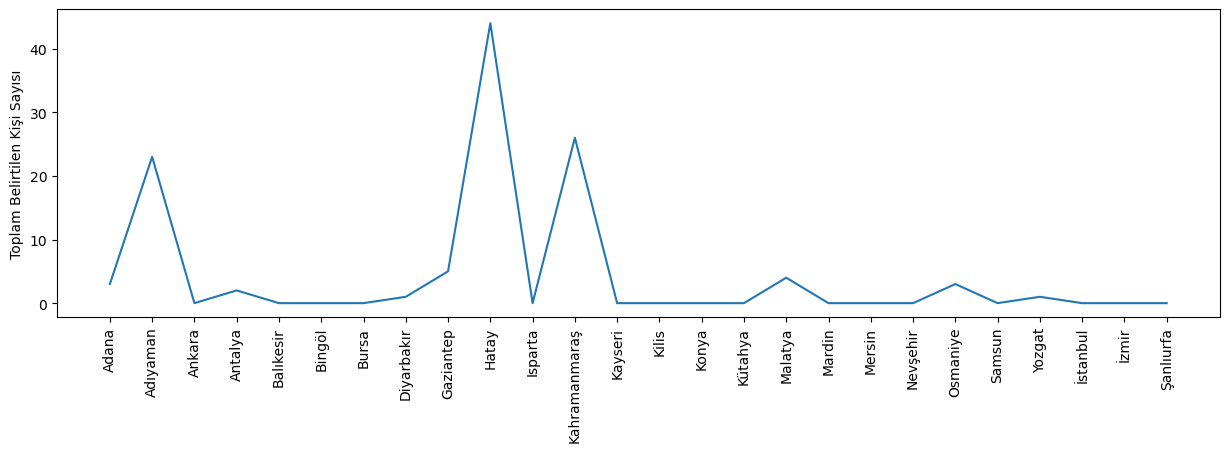

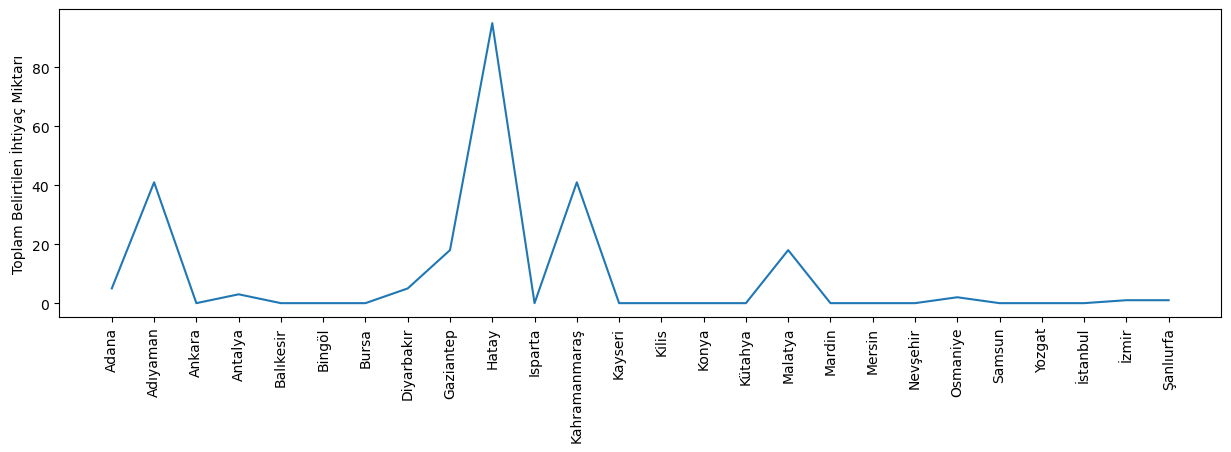

In [44]:
plt.figure(figsize=(15,4))
sns.lineplot(x=df["Şehirler"],y=df["toplam_kisi_sayisi"],data=df)
plt.xticks(rotation=90);
plt.xlabel("");
plt.ylabel("Toplam Belirtilen Kişi Sayısı");
plt.figure(figsize=(15,4))
sns.lineplot(x=df["Şehirler"],y=df["toplam_ihtiyac_sayisi"],data=df)
plt.xticks(rotation=90);
plt.xlabel("");
plt.ylabel("Toplam Belirtilen İhtiyaç Miktarı");

In [45]:
df2 = pd.read_csv("earthquake.csv")

In [46]:
from keplergl import KeplerGl
w1=KeplerGl(height=600)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [49]:
w1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [], 'interactionConfig': {'…

In [50]:
with open('earthquake.csv','r') as f:
    csvData = f.read()
w1.add_data(data=df, name='city_sorted')
w1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [], 'interactionConfig': {'…